In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

In [2]:
#load data 
X, Y = load_data()
print("Shape X:", X.shape)
print("Shape Y:", Y.shape)
print(f"\nThe first element of X is : {X[0]}")

Shape X: (1000, 400)
Shape Y: (1000, 1)

The first element of X is : [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.0

111
547
667
470
21
212
48
723
41
562
806
395
725
148
803
626
692
795
962
798
39
65
62
780
939
178
111
451
667
493
36
966
224
546
386
639
617
82
33
286
851
240
283
938
724
726
877
135
477
120
968
452
857
568
397
512
826
246
308
48
23
546
907
491


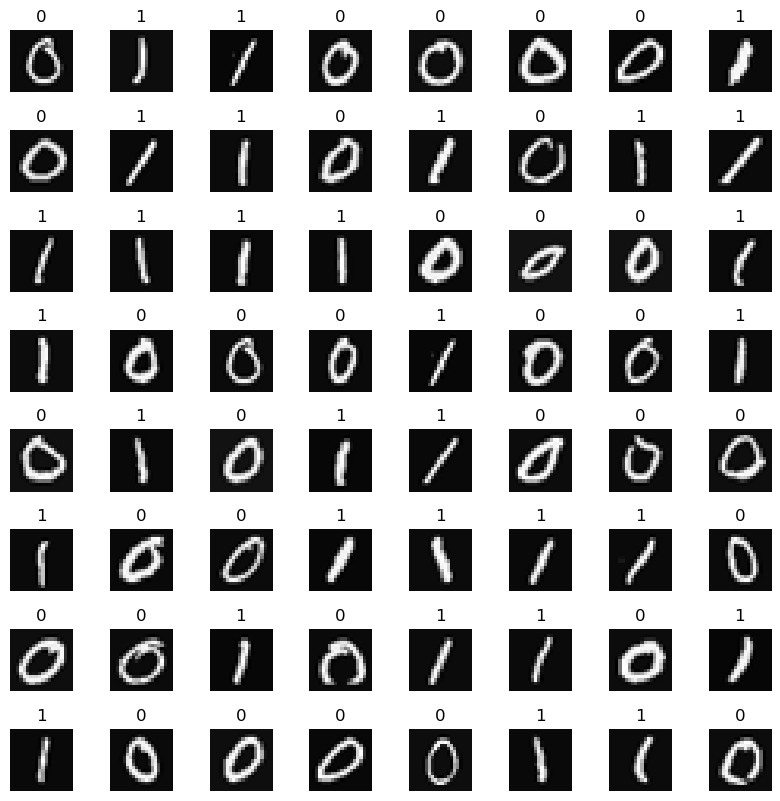

In [3]:
m, n = X.shape
fig, axes = plt.subplots(8, 8, figsize = (8, 8))
fig.tight_layout(pad=0.1)
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    print(random_index)

    X_random_reshaped = X[random_index].reshape((20, 20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(Y[random_index, 0])
    ax.set_axis_off()

In [4]:
model = Sequential([
    tf.keras.Input(shape = (400,)),
    Dense(units = 25, activation = "sigmoid"),
    Dense(units = 15, activation = "sigmoid"),
    Dense(units = 1, activation = "sigmoid")], name = "hand_rec_model")

In [5]:
model.summary()

Model: "hand_rec_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [7]:
[layer1, layer2, layer3] = model.layers

In [9]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(W1[0], b1)
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

[-0.00913028  0.02547486 -0.10841562 -0.03090654  0.10490043 -0.07797885
 -0.04089942 -0.08405364 -0.08515362  0.03261876  0.07239202  0.00617518
  0.00500672  0.08637971  0.07938533  0.09940241  0.07198454  0.1152993
  0.06662637  0.09385377  0.04898691  0.11213697 -0.09220634 -0.01767689
 -0.06182203] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [10]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(0.001),)
model.fit(X, Y, epochs = 50)

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6118
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4430
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.3006
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.2074
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1503
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1146
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0907
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0740
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0619
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 11/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0459
Epoch 12/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 13/50
32/32 [==============================

In [11]:
prediction = model.predict(X[116].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[773].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 61ms/step
 predicting a zero: [[0.00272824]]
1/1 [==============================] - 0s 18ms/step
 predicting a one:  [[0.99556565]]


In [12]:
def dense(a_in, W, b, g):
    units = W.shape[1]
    a_out = np.zeros(units)

    for j in range(units):
        w = W[:,j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)

    return(a_out)